# Partie 1: Exploration et Préparation des Données

# 1.1 Importation et Analyse Initiale

In [182]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
# Charger le dataset 
df = pd.read_csv("train.csv")
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [184]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [185]:
# faire une copie de la dataset
backup = df.copy()

In [186]:
# examiner la structure :
print("le nombre de lignes et des colonnes : ")
df.shape

le nombre de lignes et des colonnes : 


(209673, 8)

In [187]:
#Identifier les variables clés
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


1-trip_duration : Durée du trajet

Temps total de la course (probablement en minutes ou secondes)
2-distance_traveled : Distance parcourue

Distance totale du trajet (probablement en kilomètres ou miles)
3-num_of_passengers : Nombre de passagers

Combien de personnes ont pris le taxi pour cette course
4-fare : Tarif de base

Le prix de base de la course (sans pourboire ni frais supplémentaires)
5-tip : Pourboire

Le montant du pourboire laissé par le client
6-miscellaneous_fees : Frais divers

Frais supplémentaires (péages, frais d'aéroport, etc.)
7-total_fare : Tarif total

Le montant total payé = fare + tip + miscellaneous_fees
8-surge_applied : Tarification dynamique appliquée

Indique si un supplément pour forte demande a été appliqué (1 = oui, 0 = non)
Aussi appelé "prix de pointe" ou "surge pricing"

In [188]:
# Analyser les types de variables (numériques, catégorielles, temporelles)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [189]:
# Convertir num_of_passengers en entier
df['num_of_passengers'] = df['num_of_passengers'].astype(int)

In [190]:
df["surge_applied"].unique()

array([0, 1], dtype=int64)

In [191]:
# Vérifier les valeurs aberrantes et manquantes
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

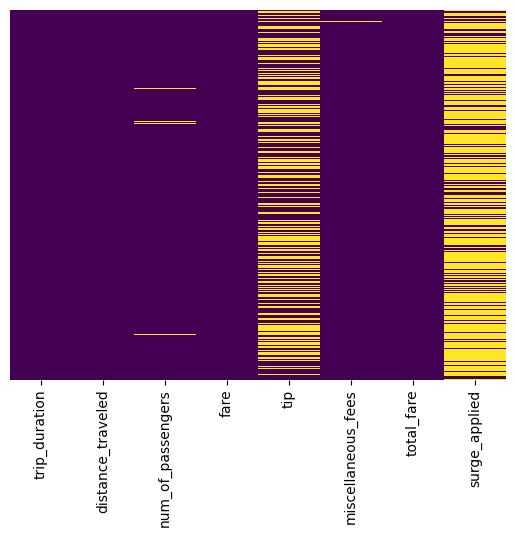

In [192]:
sns.heatmap(df==0,yticklabels=False,cbar=False,cmap='viridis')
plt.show()

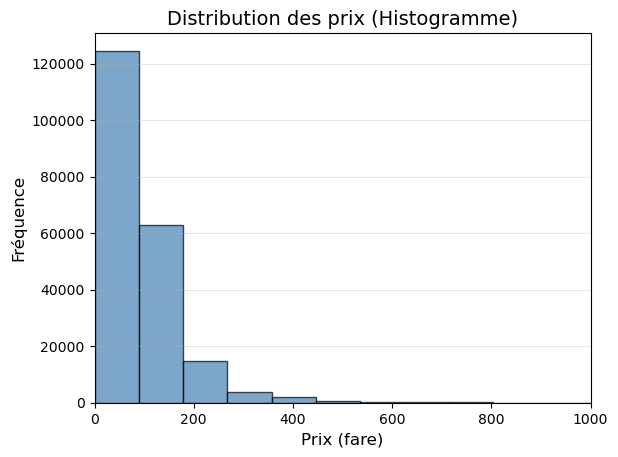

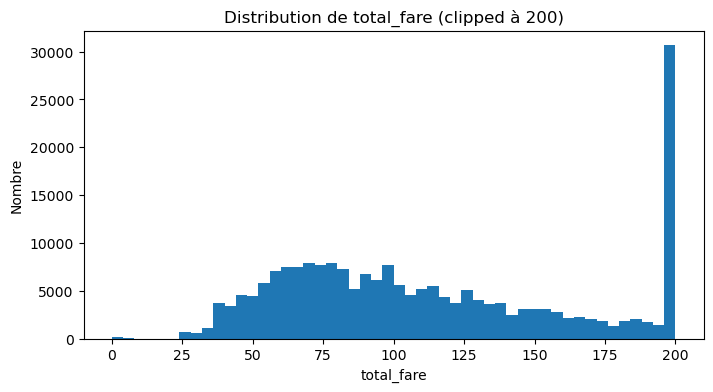

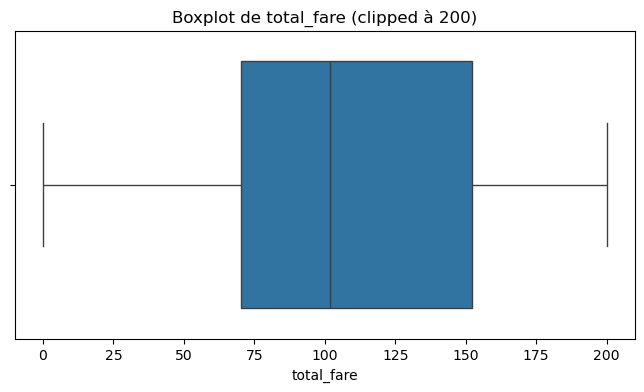

Statistiques descriptives des prix:
count    209673.000000
mean         99.623431
std          85.602702
min           0.000000
25%          52.500000
50%          75.000000
75%         116.250000
max        4466.250000
Name: fare, dtype: float64

Étendue: 4466.25
Variance: 7327.82


In [193]:
# Étudier la distribution des prix (histogramme, boxplot)

# Histogramme
plt.hist(df['fare'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution des prix (Histogramme)', fontsize=14)
plt.xlabel('Prix (fare)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xlim(0, 1000)  # Limiter l'axe des x de 0 à 1000
plt.grid(axis='y', alpha=0.3)


plt.figure(figsize=(8,4))
plt.hist(df['total_fare'].clip(0,200), bins=50)
plt.title('Distribution de total_fare (clipped à 200)')
plt.xlabel('total_fare'); plt.ylabel('Nombre')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['total_fare'].clip(0,200))
plt.title('Boxplot de total_fare (clipped à 200)')
plt.show()

# Statistiques descriptives
print("Statistiques descriptives des prix:")
print(df['fare'].describe())
print(f"\nÉtendue: {df['fare'].max() - df['fare'].min():.2f}")
print(f"Variance: {df['fare'].var():.2f}")

In [194]:
# Convertir trip_duration de secondes en minutes
df['trip_duration'] = (df['trip_duration'] / 60).round(2)

In [195]:
print("min: ",df['trip_duration'].min(),"min \n")
print("max: ",df['trip_duration'].max(),"min \n")
print("moyenne: ",df['trip_duration'].mean().round(2),"min ")

min:  0.0 min 

max:  1439.78 min 

moyenne:  19.55 min 


In [220]:
# Analyser et supprimer les outliers de trip_duration
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure pour qu'elle ne soit pas négative
lower_bound = max(lower_bound, 2)  # Minimum de 2 minutes

print(f"Q1: {Q1:.2f} minutes")
print(f"Q3: {Q3:.2f} minutes")
print(f"IQR: {IQR:.2f} minutes")
print(f"Limite supérieure: {upper_bound:.2f} minutes")
print(f"Limite inférieure: {lower_bound:.2f} minutes")

# Nombre d'outliers
outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['trip_duration'].min():.2f} min")
print(f"Max: {df['trip_duration'].max():.2f} min")
print(f"Mean: {df['trip_duration'].mean():.2f} min")
print(f"Median: {df['trip_duration'].median():.2f} min")

Q1: 446.00 minutes
Q3: 1098.00 minutes
IQR: 652.00 minutes
Limite supérieure: 2076.00 minutes
Limite inférieure: 2.00 minutes

Outliers détectés: 11959 (5.70%)
Avant: 209673 lignes
Après: 197714 lignes

Nouvelles stats:
Min: 2.00 min
Max: 2076.00 min
Mean: 759.53 min
Median: 675.00 min


In [197]:
print("min: ",df['distance_traveled'].min(),"km\n")
print("max: ",df['distance_traveled'].max(),"km !!!\n")
print("moyenne: ",df['distance_traveled'].mean(),"km")

min:  0.02 km

max:  57283.91 km !!!

moyenne:  4.51531036159285 km


In [198]:
# Analyser et supprimer les outliers de distance_traveled
Q1 = df['distance_traveled'].quantile(0.25)
Q3 = df['distance_traveled'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure pour qu'elle ne soit pas négative
lower_bound = max(lower_bound, 0.1)  # Minimum 0.1 km (100 mètres)

print(f"Q1: {Q1} km")
print(f"Q3: {Q3} km")
print(f"Limite supérieure: {upper_bound} km")
print(f"Limite inférieure: {lower_bound} km")

# Nombre d'outliers
outliers = df[(df['distance_traveled'] < lower_bound) | (df['distance_traveled'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['distance_traveled'] >= lower_bound) & (df['distance_traveled'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['distance_traveled'].min()} km")
print(f"Max: {df['distance_traveled'].max()} km")
print(f"Mean: {df['distance_traveled'].mean():.2f} km")

Q1: 1.95 km
Q3: 5.2 km
Limite supérieure: 10.075 km
Limite inférieure: 0.1 km

Outliers détectés: 14277 (7.38%)
Avant: 193339 lignes
Après: 179062 lignes

Nouvelles stats:
Min: 0.1 km
Max: 10.07 km
Mean: 3.47 km


In [199]:
# frais divers
df["miscellaneous_fees"][df['miscellaneous_fees']<0]

22479    -0.250
23194    -0.250
27452    -0.500
30167    -0.500
66388    -0.500
78548    -0.500
83042    -0.375
88830    -0.250
98606    -0.500
100716   -0.500
125277   -0.500
155539   -0.250
168516   -0.500
175321   -0.500
175546   -0.500
178085   -0.500
190615   -0.500
207354   -0.250
Name: miscellaneous_fees, dtype: float64

In [200]:
print("min: ",df['miscellaneous_fees'].min(),"$")
print("max: ",df['miscellaneous_fees'].max(),"$")
print("moyenne: ",df['miscellaneous_fees'].mean(),"$")

min:  -0.5 $
max:  159.75 $
moyenne:  13.960203728317566 $


In [201]:
# Analyser et supprimer les outliers de miscellaneous_fees
Q1 = df['miscellaneous_fees'].quantile(0.25)
Q3 = df['miscellaneous_fees'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum 0)
lower_bound = max(lower_bound, 0.0)  # Minimum 0.00 $ (pas de frais négatifs)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['miscellaneous_fees'] < lower_bound) | (df['miscellaneous_fees'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['miscellaneous_fees'] >= lower_bound) & (df['miscellaneous_fees'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['miscellaneous_fees'].min()} $")
print(f"Max: {df['miscellaneous_fees'].max()} $")
print(f"Mean: {df['miscellaneous_fees'].mean():.2f} $")
print(f"Median: {df['miscellaneous_fees'].median():.2f} $")

Q1: 6.0 $
Q3: 26.200000000000003 $
IQR: 20.200000000000003 $
Limite supérieure: 56.50000000000001 $
Limite inférieure: 0.0 $

Outliers détectés: 387 (0.22%)
Avant: 179062 lignes
Après: 178675 lignes

Nouvelles stats:
Min: 0.0 $
Max: 55.875 $
Mean: 13.85 $
Median: 9.75 $


In [202]:
print("min: ",df['total_fare'].min(),"$")
print("max: ",df['total_fare'].max(),"$")
print("moyenne: ",df['total_fare'].mean(),"$")

min:  0.0 $
max:  2582.85 $
moyenne:  103.62046844829999 $


In [203]:
# Analyser et supprimer les outliers de total_fare
Q1 = df['total_fare'].quantile(0.25)
Q3 = df['total_fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum NYC)
lower_bound = max(lower_bound, 3.0)  # Minimum 3.00 $ (NYC)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['total_fare'] < lower_bound) | (df['total_fare'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['total_fare'] >= lower_bound) & (df['total_fare'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['total_fare'].min()} $")
print(f"Max: {df['total_fare'].max()} $")
print(f"Mean: {df['total_fare'].mean():.2f} $")
print(f"Median: {df['total_fare'].median():.2f} $")

Q1: 69.75 $
Q3: 129.75 $
IQR: 60.0 $
Limite supérieure: 219.75 $
Limite inférieure: 3.0 $

Outliers détectés: 3180 (1.78%)
Avant: 178675 lignes
Après: 175495 lignes

Nouvelles stats:
Min: 3.0 $
Max: 219.75 $
Mean: 100.73 $
Median: 92.25 $


In [204]:
print("min: ",df['tip'].min(),"$")
print("max: ",df['tip'].max(),"$")
print("moyenne: ",df['tip'].mean(),"$")

min:  0 $
max:  188 $
moyenne:  10.46473118892276 $


In [205]:
# Analyser et supprimer les outliers de tip
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum 0, les pourboires peuvent être 0)
lower_bound = max(lower_bound, 0.0)  # Minimum 0.00 $ (pas de pourboire négatif)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['tip'] < lower_bound) | (df['tip'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['tip'].min()} $")
print(f"Max: {df['tip'].max()} $")
print(f"Mean: {df['tip'].mean():.2f} $")
print(f"Median: {df['tip'].median():.2f} $")

Q1: 0.0 $
Q3: 18.0 $
IQR: 18.0 $
Limite supérieure: 45.0 $
Limite inférieure: 0.0 $

Outliers détectés: 679 (0.39%)
Avant: 175495 lignes
Après: 174816 lignes

Nouvelles stats:
Min: 0 $
Max: 45 $
Mean: 10.27 $
Median: 8.00 $


In [206]:
# supprimer les courses avec 0 passager ou plus que 3
df.drop(df[(df['num_of_passengers'] == 0) | (df['num_of_passengers'] > 4)].index, inplace=True)

In [207]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,12.47,2.75,1,75.00,24,6.300,105.300,0
1,19.78,3.43,1,105.00,24,13.200,142.200,0
2,12.17,3.12,1,71.25,0,26.625,97.875,1
3,11.18,5.63,3,90.00,0,9.750,99.750,0
4,5.48,2.09,1,45.00,12,13.200,70.200,0


In [208]:
# Vérifier la cohérence de total_fare
df['calculated_total'] = df['fare'] + df["tip"] + df['miscellaneous_fees']

# Comparer avec total_fare (avec une tolérance pour les erreurs d'arrondi)
df['difference'] = abs(df['total_fare'] - df['calculated_total'])

# Afficher les statistiques
print("Vérification de la cohérence de total_fare:")
print(f"Nombre de lignes avec différence > 0.01: {len(df[df['difference'] > 0.01])}")


# Afficher les lignes incohérentes
incoherent = df[df['difference'] > 0.01]
if len(incoherent) > 0:
    print(f"\n{len(incoherent)} lignes incohérentes trouvées:")
    print(incoherent[['fare', 'tip', 'miscellaneous_fees', 'total_fare', 'calculated_total', 'difference']].head(10))
else:
    print("\n✅ Toutes les lignes sont cohérentes!")

# Nettoyer les colonnes temporaires
df.drop(['calculated_total', 'difference'], axis=1, inplace=True)

Vérification de la cohérence de total_fare:
Nombre de lignes avec différence > 0.01: 0

✅ Toutes les lignes sont cohérentes!


1.2 Nettoyage et Feature Engineering

In [209]:
#Supprimer les courses avec des prix négatifs ou extrêmes

# Afficher le nombre de lignes après suppression
print(f"\nNombre de lignes après suppression: {len(df)}")

# Analyser et supprimer les outliers de fare
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum NYC)
lower_bound = max(lower_bound, 3.0)  # Minimum 3.00 $ (NYC)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
print(f"Après: {len(df)} lignes")
print(f"Nombre de courses avec fare > 211.875$: {len(df[df['fare'] > 211.875])}")
print(f"Nombre de courses avec fare < 0$: {len(df[df['fare'] <= 0])}")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['fare'].min()} $")
print(f"Max: {df['fare'].max()} $")
print(f"Mean: {df['fare'].mean():.2f} $")
print(f"Median: {df['fare'].median():.2f} $")




Nombre de lignes après suppression: 167279
Q1: 52.5 $
Q3: 97.5 $
IQR: 45.0 $
Limite supérieure: 165.0 $
Limite inférieure: 3.0 $

Outliers détectés: 1132 (0.68%)
Avant: 167279 lignes
Après: 166147 lignes
Nombre de courses avec fare > 211.875$: 0
Nombre de courses avec fare < 0$: 0

Nouvelles stats:
Min: 15.0 $
Max: 165.0 $
Mean: 75.83 $
Median: 71.25 $


In [210]:
# gérer les valeurs manquantes
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

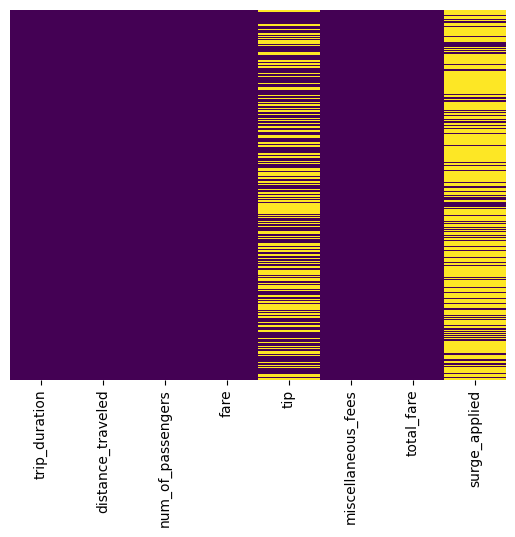

In [211]:
# dataset clean
sns.heatmap(df==0,yticklabels=False,cbar=False,cmap='viridis')
plt.show()

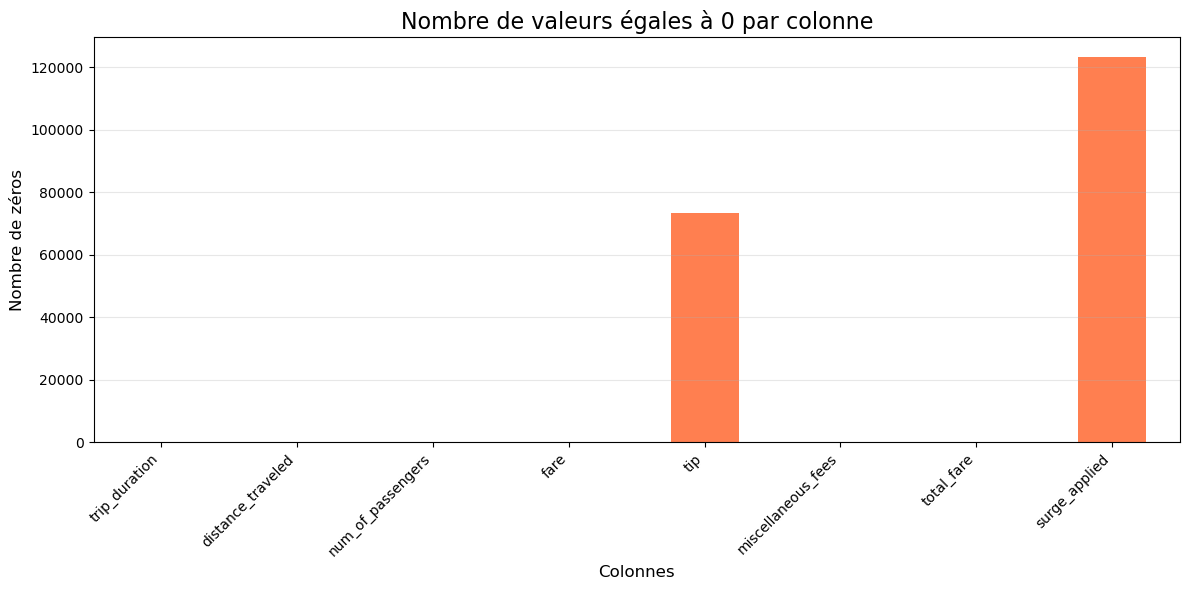


Pourcentage de zéros par colonne:
surge_applied         74.24
tip                   44.12
miscellaneous_fees     0.02
trip_duration          0.00
distance_traveled      0.00
num_of_passengers      0.00
fare                   0.00
total_fare             0.00
dtype: float64


In [212]:
# Compter et visualiser les zéros par colonne
zero_counts = (df == 0).sum()

plt.figure(figsize=(12, 6))
zero_counts.plot(kind='bar', color='coral')
plt.title('Nombre de valeurs égales à 0 par colonne', fontsize=16)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Nombre de zéros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher les pourcentages
print("\nPourcentage de zéros par colonne:")
print(((df == 0).sum() / len(df) * 100).round(2).sort_values(ascending=False))

In [217]:
# Standardiser les features numériques
from sklearn.preprocessing import StandardScaler

# Séparer les features numériques et la cible
# On retire 'tip' car il fait partie de total_fare (éviter le data leakage)
features = ['trip_duration', 'distance_traveled']
X = df[features]
y = df['total_fare']

print("="*60)
print("AVANT STANDARDISATION:")
print("="*60)
print(X.describe().round(2))

# Standardiser
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créer un nouveau DataFrame standardisé
df_scaled = pd.DataFrame(X_scaled, columns=features, index=df.index)

print("\n" + "="*60)
print("APRÈS STANDARDISATION:")
print("="*60)
print(df_scaled.describe().round(2))

# Vérification : la moyenne doit être ~0 et l'écart-type ~1
print("\n" + "="*60)
print("VÉRIFICATION (moyenne ≈ 0, std ≈ 1):")
print("="*60)
print(f"Moyennes:\n{df_scaled.mean().round(6)}")
print(f"\nÉcarts-types:\n{df_scaled.std().round(6)}")

# Afficher la forme des données
print("\n" + "="*60)
print("DIMENSIONS DES DONNÉES:")
print("="*60)
print(f"X (features): {X.shape}")
print(f"y (target): {y.shape}")
print(f"X_scaled (features standardisées): {df_scaled.shape}")

AVANT STANDARDISATION:
       trip_duration  distance_traveled
count      209673.00          209673.00
mean         1173.18               5.05
std          4775.65             125.22
min             0.00               0.02
25%           446.00               1.95
50%           707.00               3.20
75%          1098.00               5.73
max         86387.00           57283.91

APRÈS STANDARDISATION:
       trip_duration  distance_traveled
count      209673.00          209673.00
mean            0.00              -0.00
std             1.00               1.00
min            -0.25              -0.04
25%            -0.15              -0.02
50%            -0.10              -0.01
75%            -0.02               0.01
max            17.84             457.44

VÉRIFICATION (moyenne ≈ 0, std ≈ 1):
Moyennes:
trip_duration        0.0
distance_traveled   -0.0
dtype: float64

Écarts-types:
trip_duration        1.000002
distance_traveled    1.000002
dtype: float64

DIMENSIONS DES DONNÉES:
X (fe

In [ ]:
df_scaled.describe()

,trip_duration,distance_traveled
count,2.096730e+05,2.096730e+05
mean,1.186085e-17,-1.592742e-18
std,1.000002e+00,1.000002e+00
min,-2.456594e-01,-4.020561e-02
25%,-1.522688e-01,-2.479239e-02
50%,-9.761650e-02,-1.480973e-02
75%,-1.574269e-02,5.395179e-03
max,1.784343e+01,4.574363e+02
